# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single DataFrame
#merged_df = mouse_metadata.merge(study_results,how='outer',on='Mouse ID')
merged_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [20]:
# Checking the number of mice.
mouse_count = len(merged_df['Mouse ID'].unique())
mouse_count

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
#dup_mice
dup_mice_id = merged_df.loc[dup_mice, 'Mouse ID'].unique()
dup_mice_id

array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_all_data = merged_df.loc[merged_df['Mouse ID'] == dup_mice_id[0]]
dup_mice_all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = merged_df.drop(dup_mice_all_data.index)
clean_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [28]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(merged_df['Mouse ID'].unique())
mouse_count_clean



249

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = clean_mice_df.groupby('Drug Regimen')

mice_per_regimen = drug_regimen_df['Mouse ID'].count().sort_values(ascending=False)
#mice_per_regimen
#drug_regimen_df
reg_mean = drug_regimen_df["Tumor Volume (mm3)"].mean()
#reg_mean
reg_median = drug_regimen_df["Tumor Volume (mm3)"].median()
reg_variance = drug_regimen_df["Tumor Volume (mm3)"].var()
reg_stdev = drug_regimen_df["Tumor Volume (mm3)"].std()
reg_sem = drug_regimen_df["Tumor Volume (mm3)"].sem()
#reg_sem




In [34]:
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean':reg_mean,'Median':reg_median, 'Variance': reg_variance, 'Std Dev': reg_stdev, 'SEM':reg_sem})
summary_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = drug_regimen_df['Tumor Volume (mm3)'].agg([
    'mean',
    'median',
    'var',
    'std',
    'sem'
])

#summary_agg_df

#have to rename them now, table reverted to data name ('std', etc)
summary_agg_df = summary_agg_df.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Std Dev',
    'sem': 'SEM'
})

summary_agg_df



,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Data Rows for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Rows'>

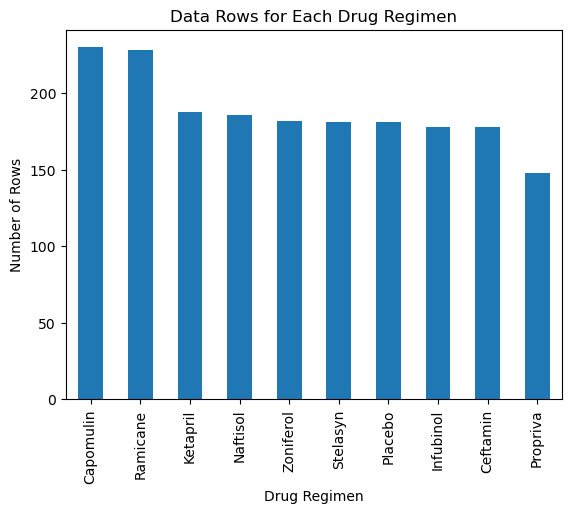

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Use .plot.typeofplot()

pandas_bar = clean_mice_df['Drug Regimen'].value_counts().plot.bar()
#pandas_bar

pandas_bar.set_title("Data Rows for Each Drug Regimen")
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Number of Rows")
pandas_bar




In [49]:
# Apply labels so people can read graph

# pandas_bar.set_title("Data Rows for Each Drug Regimen")
# pandas_bar.set_xlabel("Drug Regimen")
# pandas_bar.set_ylabel("Number of Rows")
# pandas_bar

# NOTE:  Apparently this has to be done in same code block as plot is described, so see above block

<Axes: title={'center': 'Data Rows for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Rows'>

<function matplotlib.pyplot.show(close=None, block=None)>

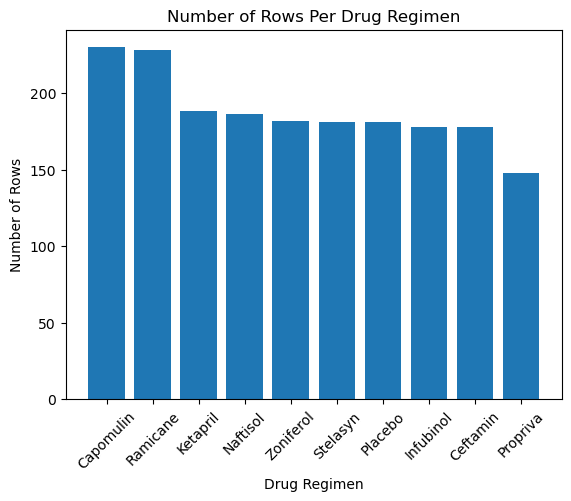

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Use .plt
#pyplot_bar = clean_mice_df['Drug Regimen'].value_counts()
rows = clean_mice_df['Drug Regimen'].value_counts()
# hints in homework assignment say to think about how to sort data to display.
# so we want to sort largest bar to smallest
x_axis = np.arange(len(rows))  #this 'arange' works like 'range' in python, like counting rows per regimen

plt.bar(x_axis,rows)
#plt.show

# Add tick marks
tick_locations = [x_value for x_value in x_axis]  #one tick per bar on x axis
plt.xticks(tick_locations, rows.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=45)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.title('Number of Rows Per Drug Regimen')
plt.show



<Axes: ylabel='Sex'>

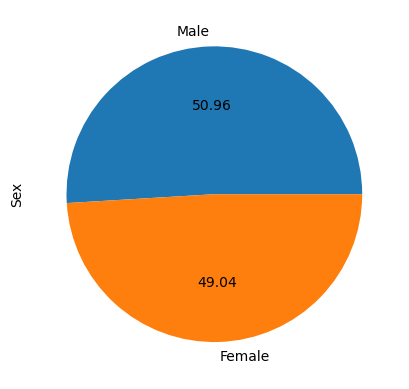

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#count them first
mouse_sex = clean_mice_df.groupby('Sex')['Sex'].count()

mouse_sex = clean_mice_df['Sex'].value_counts().plot.pie(autopct= '%.2f')

#autopct example here:
#https://stackoverflow.com/questions/69882957/how-to-surpress-some-autopct-values-plotted-on-a-pie-plot

mouse_sex

<function matplotlib.pyplot.show(close=None, block=None)>

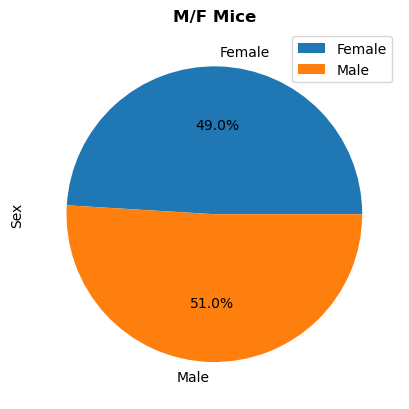

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_mouse_sex = mouse_sex.plot(kind='pie', autopct='%1.1f%%')
#formatting for showing % in pie chart:
#https://stackoverflow.com/questions/34765236/displaying-numbers-with-legend-on-pie-chart-tkinter-pyplot-matplotlib


pie_mouse_sex.set_title(label='M/F Mice', fontweight = 'bold')
pie_mouse_sex.legend()
plt.tight_layout

#plt.pie(autopct='%1.1f%%')
plt.show

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice_df.groupby(['Drug Regimen', 'Mouse ID']).sort('Timepoint')
last_timepoint( 'Tumor Volume (mm3)')
#last_timepoint( 'Timepoint','Tumor Volume (mm3)')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
Drug Regimen Mouse ID                                                    
Capomulin    b128             45           38.982878                 2   
             b742             45           38.939633                 0   
             f966             20           30.485985                 0   
             g288             45           37.074024                 1   
             g316             45           40.159220                 2   
...                          ...                 ...               ...   
Zoniferol    q633             45           70.827796                 2   
             s337             45           62.109651                 4   
             w140              5           47.717952                 0   
             w575             45           68.401286                 3   
             x613             15           48.077646                 0   

                       Age_months  Weight (g)  
Drug Regimen Mouse ID                          
Capomulin    b128               9          22  
             b742               7          21  
             f966              16          17  
             g288               3          19  
             g316              22          22  
...                           ...         ...  
Zoniferol    q633              12          25  
             s337              14          27  
             w140              19          30  
             w575              16          28  
             x613               2          29  

[248 rows x 5 columns]

In [69]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_final = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    drug_reg = last_timepoint.loc[last_timepoint['Drug Regimen'] == treatment]
    drug_reg
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


AttributeError: 'function' object has no attribute 'loc'

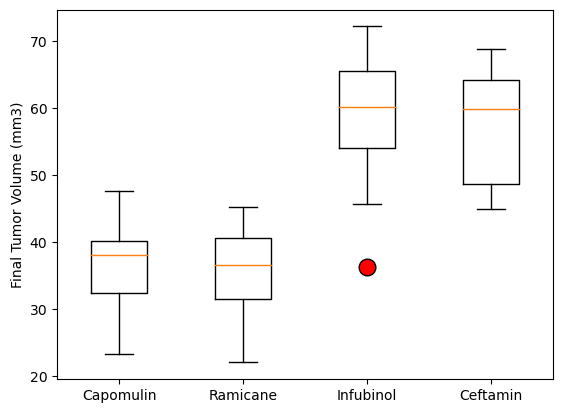

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

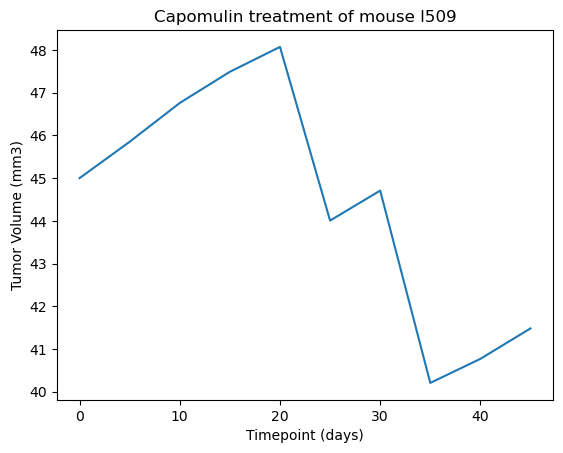

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_b128 = plt.plot()

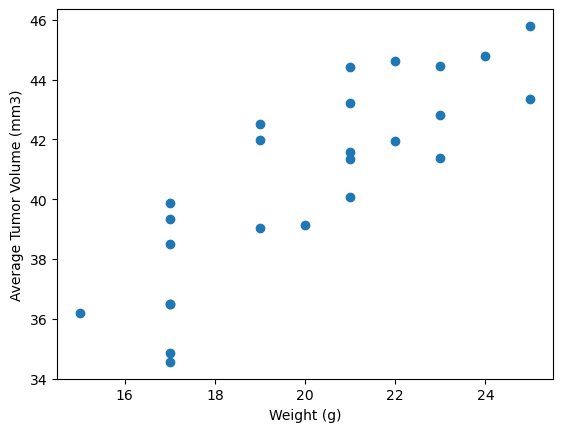

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


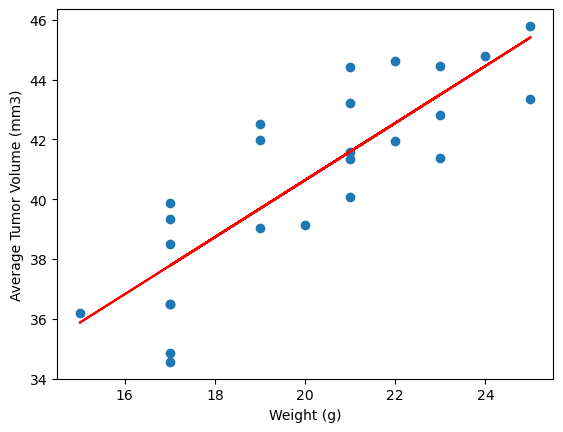

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
